In [30]:
#load the libraries 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import os

In [31]:
#change the directory to where the stocks dataset is located
os.chdir('C:\\Users\\mihir\\Desktop\\IST652\\project\\')

In [32]:
import seaborn as sns

In [33]:
stocks=pd.read_csv("stockdata.csv")

In [34]:
#Basic descriptive analysis 
stocks.dtypes

Unnamed: 0          int64
date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
company symbol     object
dtype: object

In [35]:
stocks.head()

,Unnamed: 0,date,open,high,low,close,volume,company symbol
0,0,2019-03-22,119.500,119.59,117.04,117.05,32334254,MSFT
1,1,2019-03-21,117.135,120.82,117.09,120.22,29854446,MSFT
2,2,2019-03-20,117.390,118.75,116.71,117.52,28113343,MSFT
3,3,2019-03-19,118.090,118.44,116.99,117.65,37588697,MSFT
4,4,2019-03-18,116.170,117.61,116.05,117.57,31207596,MSFT


In [7]:
stocks.shape

(220872, 8)

In [8]:
stocks.columns

Index(['Unnamed: 0', 'date', 'open', 'high', 'low', 'close', 'volume',
       'company symbol'],
      dtype='object')

In [9]:
stocks=stocks.drop(columns=['Unnamed: 0'],axis=1)

In [36]:
#convert the date to date time object
stocks['date']=pd.to_datetime(stocks['date'])

In [11]:
#Check for missing values 
stocks.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
company symbol    0
dtype: int64

In [12]:
#Average traded volume for last 5 years

In [13]:
#get the year from the date time object 
year=[i.date for i in stocks['date']]

In [14]:
stocks['year']=stocks['date'].dt.year

In [15]:
stocks.head()

,date,open,high,low,close,volume,company symbol,year
0,2019-03-22,119.500,119.59,117.04,117.05,32334254,MSFT,2019
1,2019-03-21,117.135,120.82,117.09,120.22,29854446,MSFT,2019
2,2019-03-20,117.390,118.75,116.71,117.52,28113343,MSFT,2019
3,2019-03-19,118.090,118.44,116.99,117.65,37588697,MSFT,2019
4,2019-03-18,116.170,117.61,116.05,117.57,31207596,MSFT,2019


In [16]:
stocks.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
company symbol            object
year                       int64
dtype: object

In [17]:
#group by year and company symbol
grouped=stocks.groupby(['year','company symbol'])

In [18]:
pd.options.display.float_format = '{:f}'.format

In [19]:
#get average yearly volume 
volumes=grouped['volume'].mean()

In [20]:
volumes

year  company symbol
1998  AABA              5192975.198413
      AAPL              4081426.984127
      ADBE              1112520.238095
      ADI               1344595.634921
      ADP                792072.619048
      AMAT              7618566.269841
      AMGN              3024364.682540
      AMZN              3127134.722222
      BIIB               445048.809524
      CELG               189184.126984
      CMCSA              638877.777778
      COST              1941125.793651
      CSCO             12267041.130952
      CSX                521947.222222
      CTSH               112197.794118
      GILD               373806.349206
      INTC             17229461.904762
      INTU               959421.031746
      MAR                512662.543651
      MSFT             13622545.833333
      MU                4492458.730159
      PEP               3989050.000000
      QCOM              1499876.190476
      REGN                98362.301587
      SBUX              1294162.301587
    

In [21]:
#filter for last 5 years 
google=volumes.loc[2014:2018,['GOOGL']]

In [22]:
google=pd.DataFrame(google)

In [23]:
google.index.name = 'year'
google.reset_index(inplace=True)

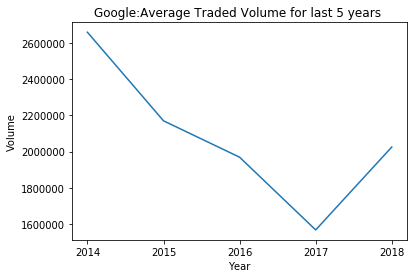

In [24]:
#get the plot
plt.plot(google['year'],google['volume'])
plt.xticks(range(2014,2019))
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Google:Average Traded Volume for last 5 years ")
plt.show()

In [25]:
companies=pd.read_csv('C:\\Users\\mihir\\Desktop\\IST652\\companylist.csv')
stocklist=companies.sort_values(by=['MarketCap'],ascending=False)[0:50]['Symbol'].tolist()    

In [26]:
#get the average volume for all 50 companies and save to disk
for i in stocklist:
    df=volumes.loc[2014:2018,[i]]
    df=pd.DataFrame(df)
    df.index.name = 'year'
    df.reset_index(inplace=True)
    plt.plot(df['year'],df['volume'])
    plt.xticks(range(2014,2019))
    plt.xlabel("Year")
    plt.ylabel("Volume")
    plt.title("{:s}:Average Traded Volume for last 5 years ".format(i))
    plt.savefig("C:\\Users\\mihir\\Desktop\\IST652\\project\\volumes\\volume_{:s}.png".format(i))
    plt.clf()
    
    

<Figure size 432x288 with 0 Axes>

In [27]:
#Technical Indicators 

In [28]:
#Simple Moving Average 
%matplotlib inline
import matplotlib.dates as mdates
def SimpleMA(n,symbol,date):
    #filter the stock 
    stock=stocks[stocks['company symbol']==symbol]
    #sort by date 
    stock=stock.sort_values(by=['date'],ascending=True)
    #calculate the moving average 
    mavg=pd.Series(stock['close'].rolling(n,min_periods=n).mean())
    nstr=str(n)+'MA'
    stock[nstr]=mavg
    #sort by descending date 
    stock=stock.sort_values(by=['date'],ascending=False)
    #filter according to input date 
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>=date)]
    fig, ax = plt.subplots()
    #plotting
    plt.plot(stock['date'],stock[nstr])
    plt.legend()
    plt.plot(stock['date'],stock['close'])
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=90)
    plt.title('{:d} day moving average for {:s}'.format(n,symbol))
    
    

C:\Users\mihir\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


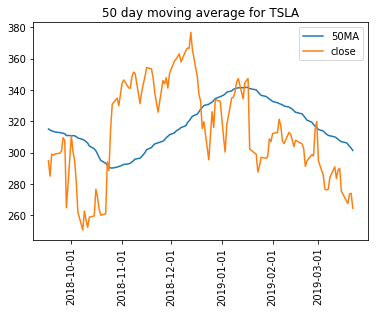

In [29]:
SimpleMA(50,'TSLA','2018-09-15')

In [30]:
stock_list=list(set(stocks['company symbol']))

In [31]:
##50SMA for top 50 companies from 2018 and saved to disk 
for symbol in stock_list:
    stock=stocks[stocks['company symbol']==symbol]
    stock=stock.sort_values(by=['date'],ascending=True)
    mavg=pd.Series(stock['close'].rolling(50,min_periods=50).mean())
    nstr=str(50)+'MA'
    stock[nstr]=mavg
    stock=stock.sort_values(by=['date'],ascending=False)
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>='2018-01-01')]
    fig, ax = plt.subplots()
    plt.plot(stock['date'],stock[nstr])
    plt.legend()
    plt.plot(stock['date'],stock['close'])
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=90)
    plt.title('50 day moving average for {:s}'.format(symbol))
    plt.savefig('C:\\Users\\mihir\\Desktop\\IST652\\project\\SMA50\\50SMA_{:s}'.format(symbol))
    plt.clf()

C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\mihir\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume t

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
#Exponential Moving Average
%matplotlib inline
import matplotlib.dates as mdates
def ExpMA(n,symbol,date):
    stock=stocks[stocks['company symbol']==symbol]
    stock=stock.sort_values(by=['date'],ascending=True)
    mavg=pd.Series(stock['close'].ewm(span=n,min_periods=n).mean())
    nstr=str(n)+'MA'
    stock[nstr]=mavg
    stock=stock.sort_values(by=['date'],ascending=False)
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>=date)]
    fig, ax = plt.subplots()
    plt.plot(stock['date'],stock[nstr])
    plt.legend()
    plt.plot(stock['date'],stock['close'])
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=90)
    plt.title('{:d} day exponential moving average for {:s}'.format(n,symbol))
    
    


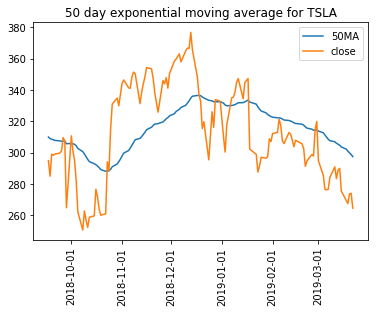

In [33]:
ExpMA(50,'TSLA','2018-09-15')

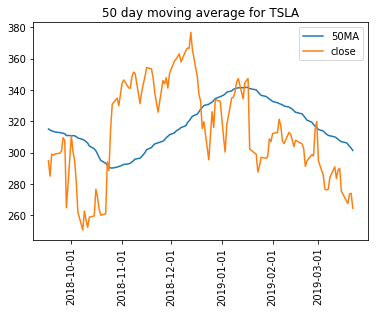

In [34]:
SimpleMA(50,'TSLA','2018-09-15')

In [35]:
#Moving average convergence Divergence(MACD)
def MACD(symbol,date):
    #filter based on symbol 
    stock=stocks[stocks['company symbol']==symbol]
    #sort ascending 
    stock=stock.sort_values(by=['date'],ascending=True)
    #calculate 12 day and 26 day EMA 
    mavg12=pd.Series(stock['close'].ewm(span=12,min_periods=12).mean())
    mavg26=pd.Series(stock['close'].ewm(span=26,min_periods=26).mean())
    #get MACD line 
    stock['MACD']=mavg12-mavg26
    #get Signal line 
    stock['signal']=pd.Series(stock['MACD'].ewm(span=9,min_periods=9).mean())
    stock=stock.sort_values(by=['date'],ascending=False)
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>=date)]
    #plotting 
    fig, ax = plt.subplots()
    plt.subplot(2, 1, 1)
    plt.plot(stock['date'],stock['close'])
    ax.xaxis.set_visible(False)
    plt.title('MACD Signal for {:s}'.format(symbol))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(stock['date'],stock['MACD'])
    plt.legend()
    plt.plot(stock['date'],stock['signal'])
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=90)
    
    
    

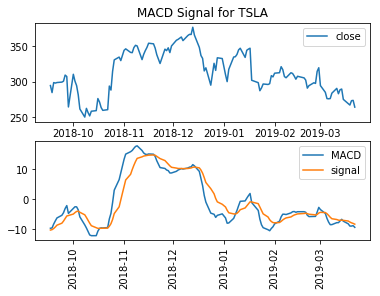

In [36]:
MACD('TSLA','2018-09-15')

In [37]:
#RSI Relative Stregth Index 

In [38]:
import matplotlib.dates as mdates
def RSI(symbol,date):
     #filter based on symbol 
    stock=stocks[stocks['company symbol']==symbol]
    stock=stock.sort_values(by=['date'],ascending=True)
    #calculate the difference between close prices 
    diff=stock['close'].diff()
    #Get the gains and losses 
    Up= diff.copy()
    Down= diff.copy()
    #set Up=0 for down and Down=0 for Up
    Up[Up<0]=0
    Down[Down>0]=0
    stock['Up']=Up
    stock['Down']=Down
    #get the weighted means 
    Up=pd.Series(stock['Up'].ewm(span=14,min_periods=14).mean())
    Down=pd.Series(stock['Down'].ewm(span=14,min_periods=14).mean().abs())
    #Calculate Relative strength 
    RS=Up/Down
    #calculate RSI
    stock['RSI']=100.0-(100.0/(1+RS))
    stock=stock.sort_values(by=['date'],ascending=False)
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>=date)]
    
    #PLot RSI
    fig, ax = plt.subplots()
    plt.subplot(2, 1, 1)
    plt.plot(stock['date'],stock['close'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=90)
    plt.title('Relative Strength Index {:s}'.format(symbol))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(stock['date'],stock['RSI'],color='g')
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.legend()
    #overbought
    plt.hlines(y=70,xmin=min(stock['date']),xmax=max(stock['date']), linestyles='dashed',label='Positive Sentiment',color='r')
    #oversold 
    plt.hlines(y=30,xmin=min(stock['date']),xmax=max(stock['date']), linestyles='dashed',label='Positive Sentiment',color='r')
    plt.xticks(rotation=90)
    plt.show()
   
    

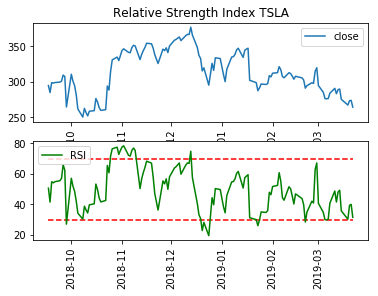

In [39]:
RSI('TSLA','2018-09-15')

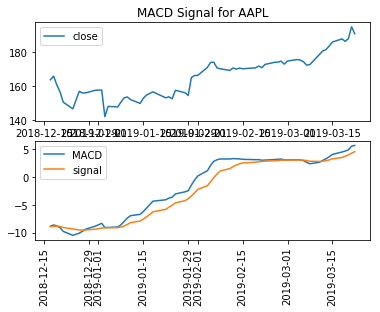

In [40]:
MACD('AAPL','2018-12-15')

In [5]:
#Trading Strategy 
#buy and sell calls using macd and volume
def generate_calls(symbol,date):
    #generate MACD signals 
    stock=stocks[stocks['company symbol']==symbol]
    stock=stock.sort_values(by=['date'],ascending=True)
    mavg12=pd.Series(stock['close'].ewm(span=12,min_periods=12).mean())
    mavg26=pd.Series(stock['close'].ewm(span=26,min_periods=26).mean())

    stock['MACD']=mavg12-mavg26
    stock['signal']=pd.Series(stock['MACD'].ewm(span=9,min_periods=9).mean())
    stock=stock.sort_values(by=['date'],ascending=False)
    stock=stock[(stock['date']<='2019-03-22') & (stock['date']>=date)]
    #as we need at least 3 values for the avg volume we set the firts 3 to Not available
    position=["Not Available","Not Available","Not Available"]
    macd=stock['MACD'].tolist()
    signal=stock['signal'].tolist()
    #reverse as indicator works linear in date and not backwards
    macd=macd[::-1]
    signal=signal[::-1]
    #volume 
    volume=stock['volume'].tolist()
    volume=volume[::-1]
    
    for i in range(3,len(macd)):
        #avg volume for last 3 days
        avg=(volume[i-1]+volume[i-2]+volume[i-3])/3
        
        #MACD crosses signal line from below BUY
        if macd[i] > signal[i] and macd[i-1] <= signal[i-1] and volume[i]> avg:
            position.append("Buy")
        #MACD crosses signal line from above SELL
        elif macd[i] < signal[i] and macd[i-1] >= signal[i-1] and volume[i]> avg:
            position.append("Sell")
        else:
            #dont do anything
            position.append("Hold")
    position=position[::-1]
    stock["call"]=position
    stock=stock[['date','close','company symbol','call']]
    return stock

In [42]:
generate_calls('GOOGL','2018-01-15')

,date,close,company symbol,call
16017,2019-03-22,1207.650000,GOOGL,Hold
16018,2019-03-21,1236.130000,GOOGL,Hold
16019,2019-03-20,1226.430000,GOOGL,Hold
16020,2019-03-19,1202.460000,GOOGL,Hold
16021,2019-03-18,1188.550000,GOOGL,Hold
16022,2019-03-15,1190.300000,GOOGL,Hold
16023,2019-03-14,1192.530000,GOOGL,Hold
16024,2019-03-13,1199.060000,GOOGL,Hold
16025,2019-03-12,1197.250000,GOOGL,Hold
16026,2019-03-11,1179.260000,GOOGL,Hold


In [37]:
tsla=generate_calls('TSLA','2018-06-15')

In [8]:
tsla.to_csv("tesla_calls.csv")